In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import string

In [2]:
df=pd.read_excel('F:\\Datasets\\retreived_data.xlsx', encoding='latin1')
df['full_script']=df['full_script'].str.lower()
df

,URL,Comedian,Special,full_script
0,https://scrapsfromtheloft.com/2018/05/05/john-...,John Mulaney,Kid Gorgeous At Radio City,[organ music playing] welcome to radio city mu...
1,https://scrapsfromtheloft.com/2017/09/25/john-...,John Mulaney,New In Town,[funky 90’s beat and cityscape pan] [singing] ...
2,https://scrapsfromtheloft.com/2017/08/02/john-...,John Mulaney,The Comeback Kid,"armed with boyish charm and a sharp wit, the f..."
3,https://scrapsfromtheloft.com/2018/05/15/ali-w...,Ali Wong,Hard Knock Wife,"ladies and gentlemen, please welcome to the st..."
4,https://scrapsfromtheloft.com/2017/09/19/ali-w...,Ali Wong,Baby Cobra,"ladies and gentlemen, please welcome to the st..."
5,https://scrapsfromtheloft.com/2020/05/26/hanna...,Hannah Gadsby,Douglas,the following is the transcript of hannah gadb...
6,https://scrapsfromtheloft.com/2018/07/21/hanna...,Hannah Gadsby,Nanette,[“bobby reid” plays]\n♪ there’s blood in the w...
7,https://scrapsfromtheloft.com/2017/09/28/neal-...,Neal Brennan,3 Mics,"[announcer] ladies and gentlemen, neal brennan..."
8,https://scrapsfromtheloft.com/2019/11/20/iliza...,Iliza Shlesinger,Unveiled,"thank you, nashville! thank you. so this year ..."
9,https://scrapsfromtheloft.com/2018/09/13/iliza...,Iliza Shlesinger,Freezing Hot,we’re in denver. i have what i’m hoping is alt...


## Cleaning the Corpus


In [3]:
def clean_1(script):
    script = re.sub('\[.*?\]', '', script)
    script= re.sub('[%s]' % re.escape(string.punctuation), '', script)
    script= re.sub('\w*\d\w*', '', script)
    script = re.sub('[‘’“”…]', '', script)
    script = re.sub('\n', '', script)
    script = re.sub('♬|♪', '', script)
    return script

In [4]:
for i in range(len(df)):
    df['full_script'][i]=clean_1(df['full_script'][i])
    
df

,URL,Comedian,Special,full_script
0,https://scrapsfromtheloft.com/2018/05/05/john-...,John Mulaney,Kid Gorgeous At Radio City,welcome to radio city music hall its time any...
1,https://scrapsfromtheloft.com/2017/09/25/john-...,John Mulaney,New In Town,new in town john mulaneys new in town h...
2,https://scrapsfromtheloft.com/2017/08/02/john-...,John Mulaney,The Comeback Kid,armed with boyish charm and a sharp wit the fo...
3,https://scrapsfromtheloft.com/2018/05/15/ali-w...,Ali Wong,Hard Knock Wife,ladies and gentlemen please welcome to the sta...
4,https://scrapsfromtheloft.com/2017/09/19/ali-w...,Ali Wong,Baby Cobra,ladies and gentlemen please welcome to the sta...
5,https://scrapsfromtheloft.com/2020/05/26/hanna...,Hannah Gadsby,Douglas,the following is the transcript of hannah gadb...
6,https://scrapsfromtheloft.com/2018/07/21/hanna...,Hannah Gadsby,Nanette,theres blood in the water wont you cut me do...
7,https://scrapsfromtheloft.com/2017/09/28/neal-...,Neal Brennan,3 Mics,ladies and gentlemen neal brennan thank you ...
8,https://scrapsfromtheloft.com/2019/11/20/iliza...,Iliza Shlesinger,Unveiled,thank you nashville thank you so this year was...
9,https://scrapsfromtheloft.com/2018/09/13/iliza...,Iliza Shlesinger,Freezing Hot,were in denver i have what im hoping is altitu...


In [5]:
df.to_excel(r'F:\Datasets\comedian_corpus.xlsx', index=False)

## Creating a Count Vectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.full_script)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.Special

data_dtm

,aaa,aaaa,aaaaave,aaaand,aah,abandonment,abc,ability,ablazing,able,...,zip,zipped,zipper,zombie,zone,zones,zoo,zoologist,zoom,zyrtec
Special,,,,,,,,,,,,,,,,,,,,,
Kid Gorgeous At Radio City,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,3,0,0,1
New In Town,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Comeback Kid,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
Hard Knock Wife,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baby Cobra,0,0,0,0,0,0,1,0,0,2,...,0,0,0,1,0,0,0,0,0,0
Douglas,0,0,0,0,0,0,0,0,1,1,...,5,0,0,0,0,0,0,0,0,0
Nanette,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3 Mics,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Unveiled,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Analysis

In [7]:
data_clean=data_dtm

data_dtm=data_dtm.transpose()
data_dtm.tail()

Special,Kid Gorgeous At Radio City,New In Town,The Comeback Kid,Hard Knock Wife,Baby Cobra,Douglas,Nanette,3 Mics,Unveiled,Freezing Hot,War Paint,Confirmed Kills,Elder Millennial,Son Of Patricia,Live At The O2 London,Live At The Apollo,Lost In Translation,Afraid Of The Dark
zones,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
zoo,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
zoologist,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
zoom,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
zyrtec,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
from collections import Counter
topwords_dic={}

for i in data_dtm.columns:
    top=data_dtm[i].sort_values(ascending=False).head(20)
    topwords_dic[i]=list(zip(top.index, top.values))
    
topwords_dic

{' Kid Gorgeous At Radio City': [('like', 81),
  ('im', 27),
  ('just', 27),
  ('dont', 26),
  ('know', 25),
  ('said', 25),
  ('thats', 24),
  ('people', 21),
  ('going', 19),
  ('years', 19),
  ('money', 19),
  ('guy', 18),
  ('hes', 18),
  ('youre', 16),
  ('right', 16),
  ('time', 16),
  ('say', 16),
  ('college', 16),
  ('did', 16),
  ('talk', 14)],
 ' New In Town': [('like', 94),
  ('new', 23),
  ('just', 22),
  ('said', 22),
  ('dont', 20),
  ('im', 19),
  ('people', 18),
  ('york', 17),
  ('know', 16),
  ('youre', 16),
  ('shh', 13),
  ('ha', 13),
  ('say', 12),
  ('uh', 12),
  ('thats', 11),
  ('got', 10),
  ('really', 10),
  ('look', 10),
  ('kids', 10),
  ('oh', 10)],
 ' The Comeback Kid': [('like', 134),
  ('know', 47),
  ('dont', 44),
  ('just', 38),
  ('thats', 28),
  ('said', 26),
  ('right', 22),
  ('time', 21),
  ('youre', 21),
  ('cow', 20),
  ('oh', 18),
  ('wife', 17),
  ('little', 17),
  ('im', 17),
  ('way', 17),
  ('say', 16),
  ('cause', 16),
  ('got', 15),
  ('

In [9]:
words = []
for spesh in data_dtm.columns:
    top = [word for (word, count) in topwords_dic[spesh]]
    for word in top:
        words.append(word)
        
words

['like',
 'im',
 'just',
 'dont',
 'know',
 'said',
 'thats',
 'people',
 'going',
 'years',
 'money',
 'guy',
 'hes',
 'youre',
 'right',
 'time',
 'say',
 'college',
 'did',
 'talk',
 'like',
 'new',
 'just',
 'said',
 'dont',
 'im',
 'people',
 'york',
 'know',
 'youre',
 'shh',
 'ha',
 'say',
 'uh',
 'thats',
 'got',
 'really',
 'look',
 'kids',
 'oh',
 'like',
 'know',
 'dont',
 'just',
 'thats',
 'said',
 'right',
 'time',
 'youre',
 'cow',
 'oh',
 'wife',
 'little',
 'im',
 'way',
 'say',
 'cause',
 'got',
 'house',
 'day',
 'like',
 'just',
 'baby',
 'dont',
 'know',
 'im',
 'shit',
 'oh',
 'come',
 'okay',
 'yeah',
 'thats',
 'husband',
 'ali',
 'people',
 'fuck',
 'pussy',
 'day',
 'got',
 'mom',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'shit',
 'youre',
 'thats',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'gotta',
 'time',
 'cause',
 'day',
 'oh',
 'right',
 'got',
 'need',
 'just',
 'like',
 'im',
 'dont',
 'know',
 'thats',
 'right',
 'joke',
 'ive',
 'bit',
 'youre',
 'dougla

In [10]:
Counter(words).most_common()

[('like', 18),
 ('im', 18),
 ('dont', 18),
 ('know', 18),
 ('thats', 18),
 ('just', 17),
 ('youre', 13),
 ('right', 13),
 ('got', 11),
 ('people', 9),
 ('said', 8),
 ('hes', 7),
 ('yeah', 7),
 ('gonna', 7),
 ('going', 6),
 ('time', 6),
 ('oh', 6),
 ('say', 5),
 ('okay', 5),
 ('black', 5),
 ('cause', 4),
 ('fuck', 4),
 ('man', 4),
 ('want', 4),
 ('theres', 4),
 ('way', 3),
 ('day', 3),
 ('come', 3),
 ('ive', 3),
 ('women', 3),
 ('guy', 2),
 ('did', 2),
 ('ha', 2),
 ('look', 2),
 ('shit', 2),
 ('lot', 2),
 ('wanna', 2),
 ('need', 2),
 ('bit', 2),
 ('good', 2),
 ('think', 2),
 ('id', 2),
 ('wedding', 2),
 ('girls', 2),
 ('girl', 2),
 ('love', 2),
 ('thing', 2),
 ('god', 2),
 ('years', 1),
 ('money', 1),
 ('college', 1),
 ('talk', 1),
 ('new', 1),
 ('york', 1),
 ('shh', 1),
 ('uh', 1),
 ('really', 1),
 ('kids', 1),
 ('cow', 1),
 ('wife', 1),
 ('little', 1),
 ('house', 1),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('mom', 1),
 ('ok', 1),
 ('gotta', 1),
 ('joke', 1),
 ('dou

In [19]:
#It is a stop-word if 7/18 specials have it

stop_words = [word for word, count in Counter(words).most_common() if count > 6]
stop_words.append('okay')
stop_words.append('ok')

In [20]:
#Remove stop words from docu-term matrix again


stp_wds=text.ENGLISH_STOP_WORDS.union(stop_words)

cv = CountVectorizer(stop_words=stp_wds)
data_cv = cv.fit_transform(df.full_script)
data_cleaned_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_cleaned_dtm.index=data_dtm.transpose().index

data_cleaned_dtm.to_excel(r'F:\Datasets\data_cleaned_dtm.xlsx', index=False)
stp_wds

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

# Analysis

Now that we have cleaned our data and gotten both our corpus and DTM, we can start playing

## Word Cloud



In [23]:
#df.head()
#c=df[df['Special']==' Kid Gorgeous At Radio City'].index.tolist()[0]
#df.full_script[c]

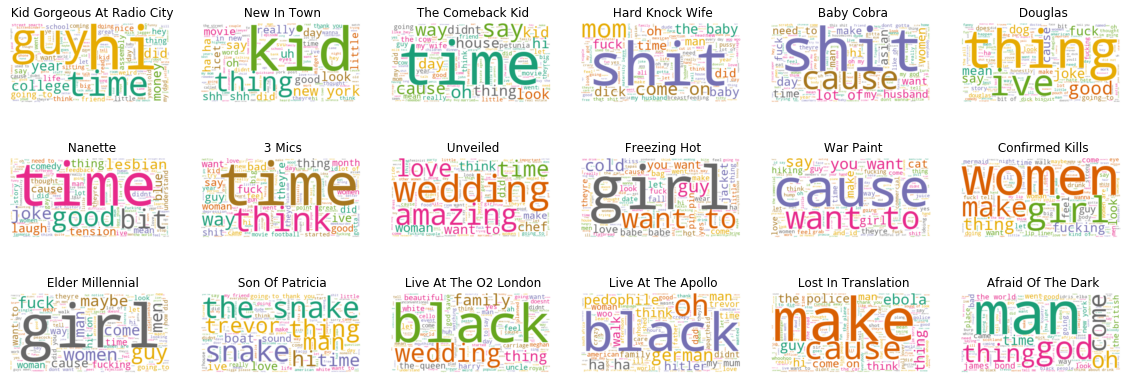

In [22]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stp_wds, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [16,6]
Special_Names=df['Special'].tolist()
Names=df['Comedian'].tolist()


for index, special in enumerate(data_cleaned_dtm.index.tolist()):
    c=df[df['Special']==special].index.tolist()[0]
    
    wc.generate(df.full_script[c])
    
    plt.subplot(3, 6, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(Special_Names[index])
    
plt.tight_layout()    
plt.show()

## Inference
1. As expected, John Mulaney specials have varied wordclouds. (Kid Gorgeous, New in Town, Comeback Kid)
2. Ali Wong has a pronounced affinity for the s word (Baby Cobra, Hard Knock Wife)
3. Hannah Gadsby and Neal Brennan apparently use time a lot, notably during anecdotal bits(Nannete, Douglas, 3 Mics)
4. Iliza Schlesinger speaks to her and other women's experiences in her comedy, well represented by her clouds, and wedding was predictably the most prominent word in Unveiled, her hysterical special centered around her engagement and marriage.(War Paint, Confirmed Kills, Freezing Hot, Elder Millenial, Unveiled)
5. Daily Show host Trevor Noah uses his comedy to speak to issues pertaining to black people.(Afraid of the Dark, Lost in Translation, Live at the Apollo, Live at the 02, Son of Patricia)

# And now for no reason at all, my favourite specials from the list: 
##### Kid Gorgeous at Radio City by John Mulaney
##### Douglas by Hannah Gadsby
##### Baby Cobra by Ali Wong